**Plotting Scatter Plot + Error Bars**

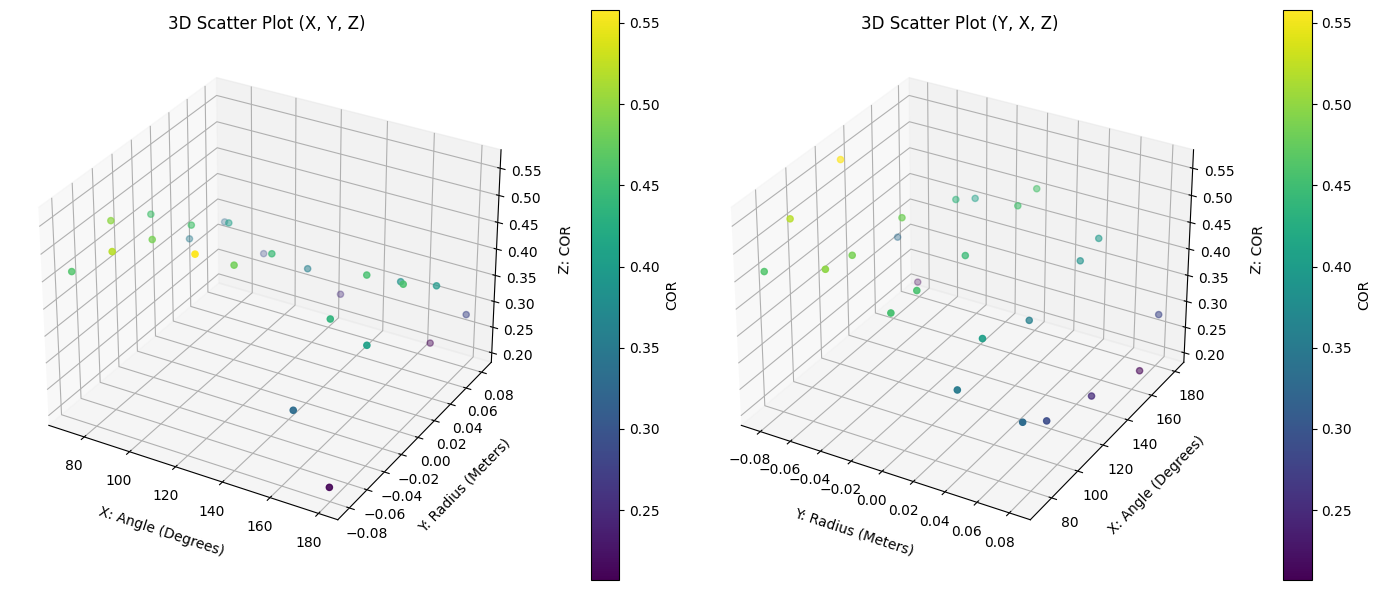

In [ ]:
#Regression Analysis for my IB Physics HL Research Project
#Analyzed how the Coefficient Of Restitution (COR) varies across different areas of a used tennis racket to determine the best place to hit the ball

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Data
x=np.array([72, 72, 72, 72, 72, 90, 90, 90, 90, 90, 125, 125, 125, 125, 125, 165, 165, 165, 165, 165, 180, 180, 180, 180, 180]) # Angle Degrees
y=np.array([-0.081, -0.041, 0, 0.041, 0.081, -0.081, -0.041, 0, 0.041, 0.081, -0.081, -0.041, 0, 0.041, 0.081, -0.081, -0.041, 0, 0.041, 0.081, -0.081, -0.041, 0, 0.041, 0.081]) # Radii in meters
z=np.array([0.462, 0.499, 0.455, 0.352, 0.330, 0.520, 0.486, 0.456, 0.404, 0.289, 0.558, 0.482, 0.445, 0.359, 0.252, 0.331, 0.435, 0.455, 0.384, 0.207, 0.210, 0.407, 0.457, 0.395, 0.282]) # COR

fig=plt.figure(figsize=(14, 6))

ax1=fig.add_subplot(121, projection='3d')
scatter1=ax1.scatter(x, y, z, c=z, cmap='viridis', marker='o', label='Data Points')
ax1.set_xlabel('X: Angle (Degrees)', labelpad=10)
ax1.set_ylabel('Y: Radius (Meters)', labelpad=10)
ax1.set_zlabel('Z: COR', labelpad=10)
ax1.set_title(f'3D Scatter Plot (X, Y, Z)')

ax2=fig.add_subplot(122, projection='3d')
scatter2=ax2.scatter(y, x, z, c=z, cmap='viridis', marker='o', label='Data Points')
ax2.set_xlabel('Y: Radius (Meters)', labelpad=10)
ax2.set_ylabel('X: Angle (Degrees)', labelpad=10)
ax2.set_zlabel('Z: COR', labelpad=10)
ax2.set_title(f'3D Scatter Plot (Y, X, Z)')

cbar1= fig.colorbar(scatter1, ax=ax1, anchor=(0.5, 0.5))
cbar1.set_label('COR')
cbar2=fig.colorbar(scatter2, ax=ax2, anchor=(0.5, 0.5))
cbar2.set_label('COR')

plt.tight_layout()
plt.show()



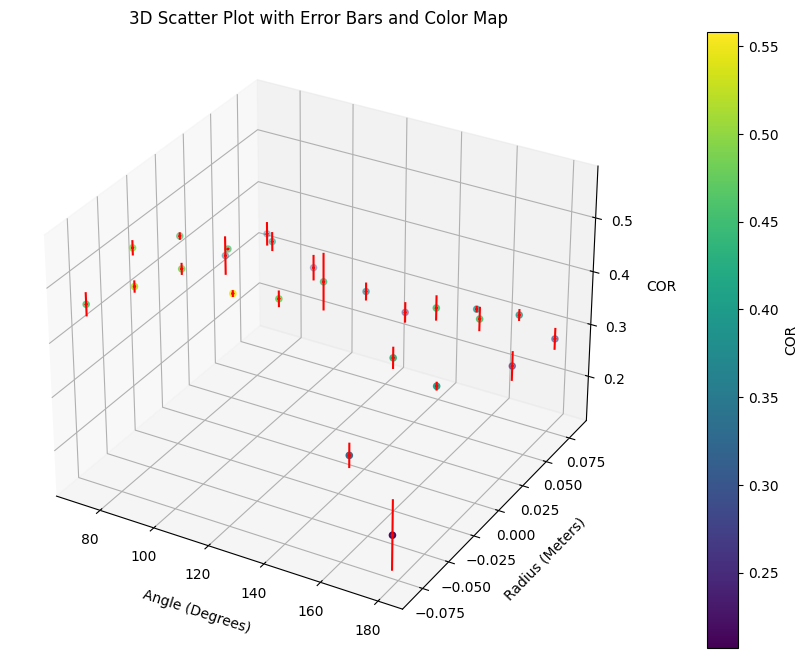

In [ ]:
error_x=np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
error_y=np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]) # Replace with your error values for y
error_z=np.array([0.022, 0.014, 0.007, 0.037, 0.023, 0.011, 0.011, 0.001, 0.018, 0.025 ,0.006, 0.015, 0.053, 0.017, 0.020, 0.023, 0.020, 0.023, 0.006, 0.029, 0.066, 0.008, 0.022, 0.011, 0.021]) # Replace with your error values for z

fig=plt.figure(figsize=(10, 8))
ax= fig.add_subplot(111, projection='3d')

scatter=ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', label='Data Points')

ax.errorbar(x, y, z, xerr=error_x, yerr=error_y, zerr=error_z, fmt='none', ecolor='red', label='Error Bars (X, Y, Z)')

cbar= fig.colorbar(scatter, ax=ax, anchor=(0.5, 0.5))
cbar.set_label('COR')

ax.set_xlabel('Angle (Degrees)', labelpad=10)
ax.set_ylabel('Radius (Meters)', labelpad=10)
ax.set_zlabel('COR', labelpad=10)
ax.set_title('3D Scatter Plot with Error Bars and Color Map')

plt.show()


**Nth Degree Polynomial Regression**

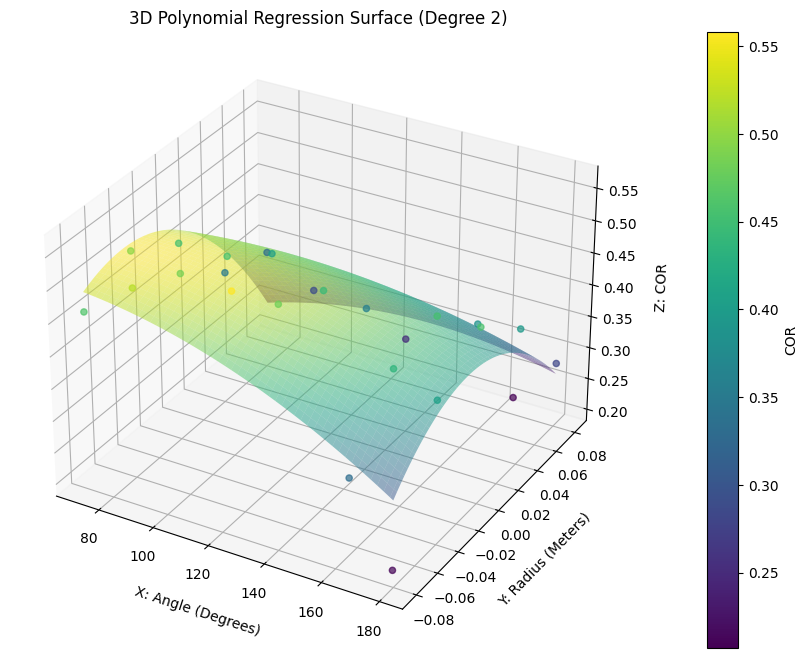

Equation: z = 0.0000 + 0.0021172x^1*y^0 + -2.3091769x^0*y^1 + -0.0000113x^2*y^0 + 0.0110297x^1*y^1 + -16.2363421x^0*y^2
R-squared value: 0.7465


In [ ]:
X=np.column_stack((x, y))

degree=2 #n value

poly=PolynomialFeatures(degree=degree)
X_poly=poly.fit_transform(X)

model=LinearRegression()
model.fit(X_poly, z)
z_pred=model.predict(X_poly)

r_squared=model.score(X_poly, z)

coefficients=model.coef_
equation = 'z = {:.4f}'.format(coefficients[0])
for i in range(1, len(coefficients)):
    equation += ' + {:.7f}x^{}*y^{}'.format(coefficients[i], poly.powers_[i][0], poly.powers_[i][1])

x_range=np.linspace(min(x), max(x), 100)
y_range=np.linspace(min(y), max(y), 100)
x_mesh, y_mesh=np.meshgrid(x_range, y_range)
X_poly_mesh=poly.fit_transform(np.column_stack((x_mesh.ravel(), y_mesh.ravel())))
z_pred_mesh=model.predict(X_poly_mesh)
z_mesh=z_pred_mesh.reshape(x_mesh.shape)

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

scatter=ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', label='Data Points', alpha=0.7)

surface=ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.5)

norm=plt.Normalize(z.min(), z.max())
sm=plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar= fig.colorbar(sm, ax=ax, anchor=(0.5, 0.5))
cbar.set_label('COR')

ax.set_xlabel('X: Angle (Degrees)', labelpad=10)
ax.set_ylabel('Y: Radius (Meters)', labelpad=10)
ax.set_zlabel('Z: COR', labelpad=10)
ax.set_title(f'3D Polynomial Regression Surface (Degree {degree})')

plt.show()

print('Equation:', equation)
print('R-squared value: {:.4f}'.format(r_squared))


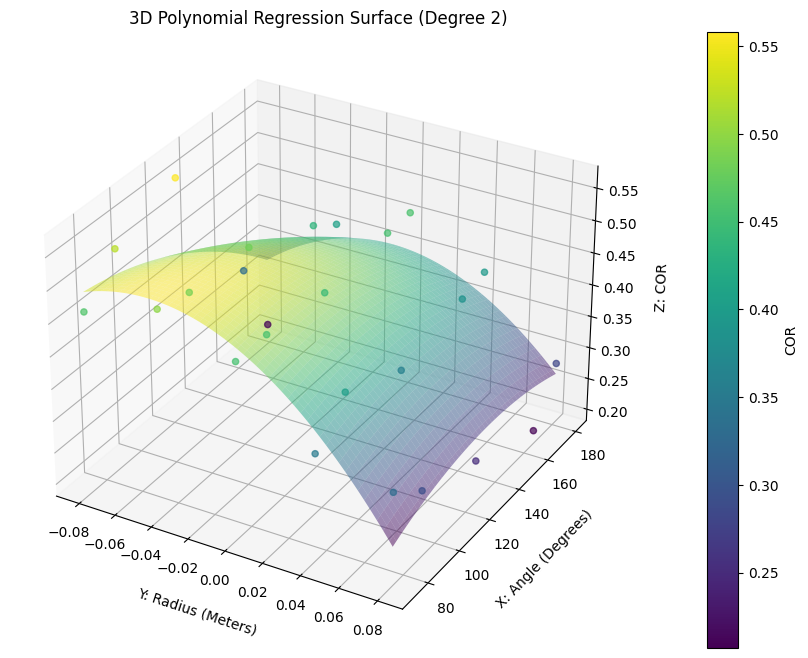

Equation: z = 0.0000 + 0.0021172x^1*y^0 + -2.3091769x^0*y^1 + -0.0000113x^2*y^0 + 0.0110297x^1*y^1 + -16.2363421x^0*y^2
R-squared value: 0.7465


In [ ]:
y_range=np.linspace(min(y), max(y), 100)
x_range=np.linspace(min(x), max(x), 100)
y_mesh, x_mesh=np.meshgrid(y_range, x_range)
X_poly_mesh=poly.fit_transform(np.column_stack((x_mesh.ravel(), y_mesh.ravel())))
z_pred_mesh=model.predict(X_poly_mesh)
z_mesh=z_pred_mesh.reshape(x_mesh.shape)

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

scatter=ax.scatter(y, x, z, c=z, cmap='viridis', marker='o', label='Data Points', alpha=0.7)

surface=ax.plot_surface(y_mesh, x_mesh, z_mesh, cmap='viridis', alpha=0.5)

norm=plt.Normalize(z.min(), z.max())
sm=plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar=fig.colorbar(sm, ax=ax, anchor=(0.5, 0.5))
cbar.set_label('COR')

ax.set_xlabel('Y: Radius (Meters)', labelpad=10)
ax.set_ylabel('X: Angle (Degrees)', labelpad=10)
ax.set_zlabel('Z: COR', labelpad=10)
ax.set_title(f'3D Polynomial Regression Surface (Degree {degree})')

plt.show()

print('Equation:', equation)
print('R-squared value: {:.4f}'.format(r_squared))


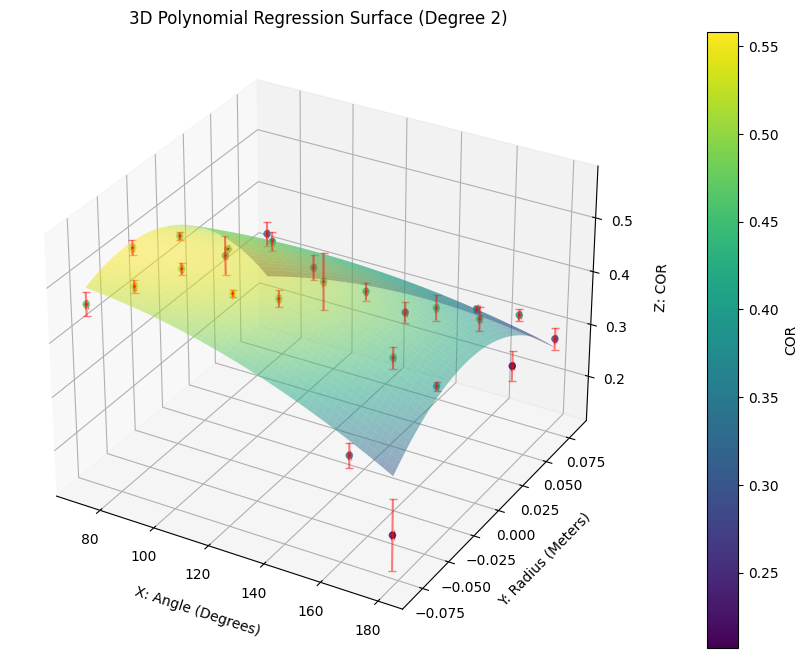

Equation: z = 0.0000 + 0.0021172x^1*y^0 + -2.3091769x^0*y^1 + -0.0000113x^2*y^0 + 0.0110297x^1*y^1 + -16.2363421x^0*y^2
R-squared value: 0.7465


In [ ]:
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

scatter=ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', label='Data Points', alpha=0.7)

ax.errorbar(x, y, z, xerr=error_x, yerr=error_y, zerr=error_z, fmt='none', ecolor='r', alpha=0.5, capsize=3)

surface=ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.5)

norm=plt.Normalize(z.min(), z.max())
sm=plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar=fig.colorbar(sm, ax=ax, anchor=(0.5, 0.5))
cbar.set_label('COR')

ax.set_xlabel('X: Angle (Degrees)', labelpad=10)
ax.set_ylabel('Y: Radius (Meters)', labelpad=10)
ax.set_zlabel('Z: COR', labelpad=10)
ax.set_title(f'3D Polynomial Regression Surface (Degree {degree})')

plt.show()

print('Equation:', equation)
print('R-squared value: {:.4f}'.format(r_squared))


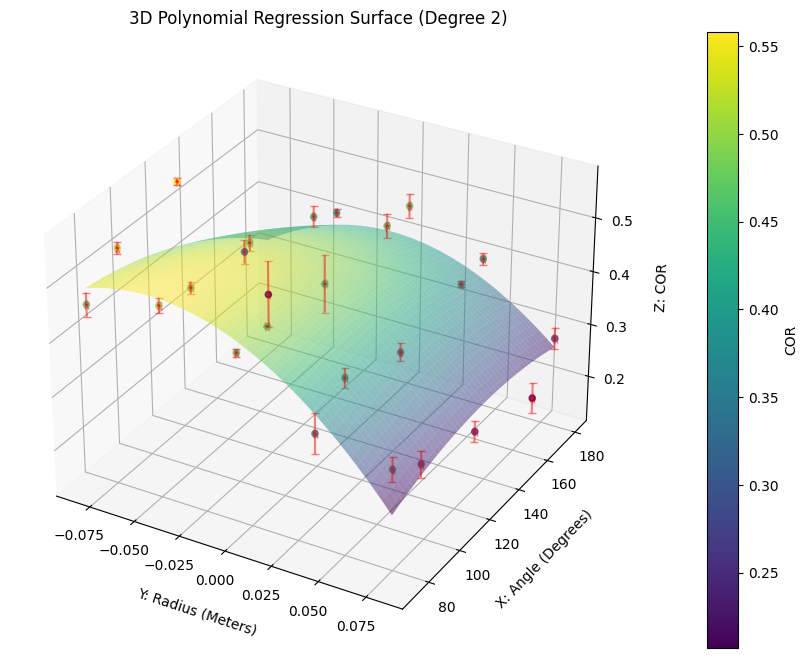

Equation: z = 0.0000 + 0.0021172x^1*y^0 + -2.3091769x^0*y^1 + -0.0000113x^2*y^0 + 0.0110297x^1*y^1 + -16.2363421x^0*y^2
R-squared value: 0.7465


In [ ]:
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

scatter=ax.scatter(y, x, z, c=z, cmap='viridis', marker='o', label='Data Points', alpha=0.7)

ax.errorbar(y, x, z, xerr=error_y, yerr=error_x, zerr=error_z, fmt='none', ecolor='r', alpha=0.5, capsize=3)

surface=ax.plot_surface(y_mesh, x_mesh, z_mesh, cmap='viridis', alpha=0.5)

norm=plt.Normalize(z.min(), z.max())
sm=plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar=fig.colorbar(sm, ax=ax, anchor=(0.5, 0.5))
cbar.set_label('COR')

ax.set_xlabel('Y: Radius (Meters)', labelpad=10)
ax.set_ylabel('X: Angle (Degrees)', labelpad=10)
ax.set_zlabel('Z: COR', labelpad=10)
ax.set_title(f'3D Polynomial Regression Surface (Degree {degree})')

plt.show()

print('Equation:', equation)
print('R-squared value: {:.4f}'.format(r_squared))
